# Práctica 3: Regresión lineal con BGD
***
Rodriguez Nuñez Diego Eduardo

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Programa 1

1. Sin utilizar las bibliotecas de scikit-learn para regresión lineal elabora un programa en python que implemente BGD monovariable

2. Entrada:
    * Archivo.csv
    * Número de iteraciones
    * Peso inicial
    * alpha

3. Divide casas.csv en 70% para entrenamiento y 30% para pruebas, con los parametros shuffle=True y random_state=0

4. Salida:
    * Peso en cada iteración calculado con el conjunto de entrenamiento
    * y_test
    * y_pred en cada predicción
    * Error de predicción Σ𝐼=1:𝑛 |𝑦_𝑝𝑟𝑒𝑑𝑖 − 𝑦_𝑡𝑒𝑠𝑡|
    * Gráfica 1:
        * distribución de los datos de prueba
        * y_pred en cada iteración
    * Gráfica 2:
        * Error en cada iteración


In [6]:
def CalcularError(y_pred,y_test):
    return np.sum(np.abs(y_pred-y_test))

def BGD_Mono(x_train,y_train,iterations,alpha,weight):
    wi = 0
    sumA = 0
    for i in range(0,iterations):
        for j in range(0,len(x_train)):
            sumA += ((wi*(x_train[j]))-y_train[j])*x_train[j]
        wi = wi - alpha*(2*sumA)
        print("Iteracion: ", i,"Peso: ",wi)

In [7]:
data = pd.read_csv('casas.csv')
data

,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99
5,255.0,0.59
6,594.0,1.37
7,625.0,1.44
8,708.0,1.63
9,468.0,1.08


In [8]:

iteration = int(input('Ingrese el número de iteraciones: '))
w0 = float(input('Ingrese el valor de w0: '))
alpha = float(input('Ingrese el valor de alpha: '))

In [9]:
x = data.drop('Precio (MDP)',axis=1).values
y = data['Precio (MDP)'].values
x,y

(array([[440.],
        [616.],
        [381.],
        [963.],
        [431.],
        [255.],
        [594.],
        [625.],
        [708.],
        [468.]]),
 array([1.01, 1.42, 0.88, 2.21, 0.99, 0.59, 1.37, 1.44, 1.63, 1.08]))

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=0,shuffle=True)

In [11]:
BGD_Mono(x_train,y_train,iteration,alpha,w0)

Iteracion:  0 Peso:  [5446.16]
Iteracion:  1 Peso:  [-1.29182098e+10]
Iteracion:  2 Peso:  [3.06418129e+16]
Iteracion:  3 Peso:  [-7.26819511e+22]
Iteracion:  4 Peso:  [1.7240057e+29]
Iteracion:  5 Peso:  [-4.0893174e+35]
Iteracion:  6 Peso:  [9.69980361e+41]
Iteracion:  7 Peso:  [-2.30077984e+48]
Iteracion:  8 Peso:  [5.45741756e+54]
Iteracion:  9 Peso:  [-1.29449181e+61]


## Programa 2

1. Sin utilizar las bibliotecas de scikit-learn para regresión lineal elabora un programa en python que implemente BGD multivariable

2. Entrada:
    * Dataset_multivariable.csv
    * Número de iteraciones
    * Peso inicial
    * alpha

3. Divide Dataset_multivariable .csv en 70% para entrenamiento y 30% para pruebas, con los parametros shuffle=True y random_state=0

4. Salida:
    * Peso en cada iteración calculado con el conjunto de entrenamiento
    * y_test
    * y_pred en cada predicción
    * Error de predicción Σi=1:𝑛 |𝑦_𝑝𝑟𝑒𝑑𝑖 − 𝑦_𝑡𝑒𝑠𝑡|
    * Gráfica 1:
        * Error de distribución Σi=1:𝑛 |𝑦_𝑝𝑟𝑒𝑑𝑖 − 𝑦_𝑡𝑒𝑠𝑡𝑖| de cada iteración

C:\Users\dern9\AppData\Local\Temp\ipykernel_17848\3616557373.py:11: RuntimeWarning: invalid value encountered in subtract
  weight -= alpha * gradient


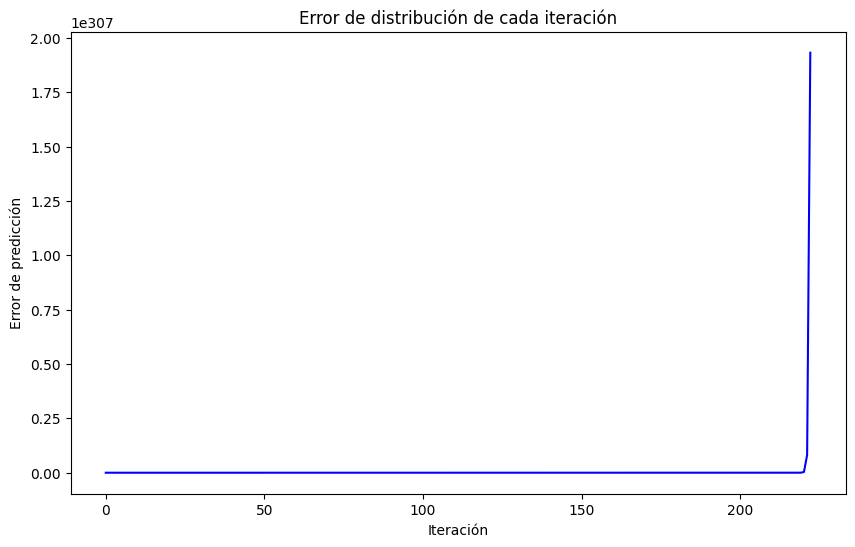

Peso final: [nan nan nan nan nan nan]
Error de predicción final: nan


In [12]:
# Función para calcular el error
def calculate_error(y_pred, y_test):
    return np.sum(np.abs(y_pred - y_test))

# Función para realizar una iteración de BGD
def gradient_descent_step(X_train, y_train, weight, alpha):
    n = len(y_train)
    y_pred = np.dot(X_train, weight)
    error = calculate_error(y_pred, y_train)
    gradient = (1/n) * np.dot(X_train.T, (y_pred - y_train))
    weight -= alpha * gradient
    return weight, error, y_pred

# Función para dividir el conjunto de datos en entrenamiento y prueba
def train_test_split(data, train_size):
    train_data = data.sample(frac=train_size, random_state=0)
    test_data = data.drop(train_data.index)
    return train_data, test_data

# Lectura del archivo CSV
data = pd.read_csv('Dataset_multivariable.csv')

# División del conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, 0.7)

# Extracción de características y etiquetas para entrenamiento y prueba
X_train = train_data.drop(columns=['y']).values
y_train = train_data['y'].values
X_test = test_data.drop(columns=['y']).values
y_test = test_data['y'].values

# Agregar una columna de unos a X para el término de sesgo (intercept)
X_train = np.column_stack((np.ones(len(X_train)), X_train))
X_test = np.column_stack((np.ones(len(X_test)), X_test))

# Parámetros
num_iterations = 1000# Número de iteraciones
initial_weight = np.zeros(X_train.shape[1])  # Peso inicial
alpha = 0.01 # Tasa de aprendizaje

# Inicialización de listas para almacenar resultados
weights_history = []
errors_history = []
y_pred_history = []

# Inicialización del peso
weight = initial_weight

# BGD
for _ in range(num_iterations):
    weight, error, y_pred = gradient_descent_step(X_train, y_train, weight, alpha)
    weights_history.append(weight)
    errors_history.append(error)
    y_pred_history.append(y_pred)

# Gráfica 1: Error de distribución de cada iteración
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), errors_history, color='blue')
plt.xlabel('Iteración')
plt.ylabel('Error de predicción')
plt.title('Error de distribución de cada iteración')
plt.show()

# Resultados finales
final_weight = weights_history[-1]
final_y_pred = y_pred_history[-1]
final_error = errors_history[-1]
print("Peso final:", final_weight)
print("Error de predicción final:", final_error)